In [10]:
Title: Titanic Classification 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [11]:
#1st i copied CSV path, then stored it in a variable to read that file |here data is the DATAFRAME
file_path = "C:/Users/pc/Desktop/train.csv"
data =pd.read_csv(file_path)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
#i want to know the dimesion and shape of my dataframe
data.shape

(891, 12)

In [13]:
#to get the statistical information about the dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#in my dataframe survied column has 2 unique values: 1] 0=not survived  2] 1=survied| inorder to get the count
# and this info can be valueable for understanding the distribution of target variable in a classification problem

survived_counts = data['Survived'].value_counts()
print(survived_counts)

Survived
0    549
1    342
Name: count, dtype: int64


In [15]:
#to get male and female count
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

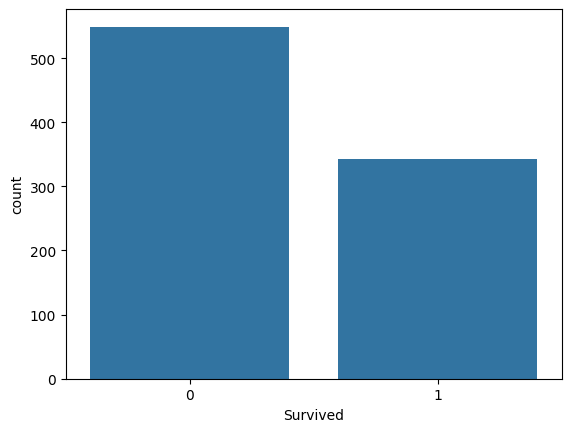

In [16]:
#for better understanding i will represnt it graphically
sns.countplot(x='Survived' , data =data)

<Axes: xlabel='Survived', ylabel='count'>

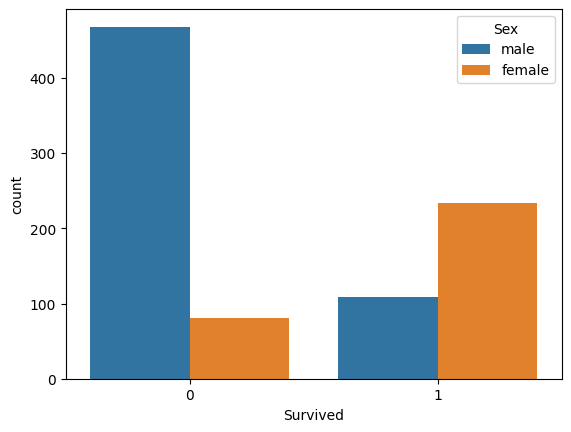

In [17]:
#this helps me to know in 0 how many are male and female and so in 1
sns.countplot(x='Survived',hue='Sex', data =data)

<Axes: xlabel='Survived', ylabel='count'>

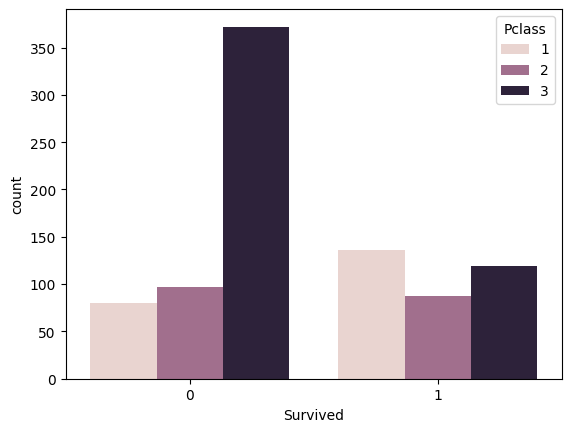

In [18]:
#visually i will represnt the info based on 1st,2nd and 3rd class
sns.countplot(x='Survived',hue='Pclass',data=data)

In [20]:
#get the survival rate by gender 
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
#I will display the unique values in the sex column and remove all the duplicate to get the distinct values
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
#for convinience I will convert sex cloumn into 1 and 0's
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#I will extract Sex and Survival column so that I can isolate and work with only these 2 columns
data['Sex'], data['Survived'] 

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

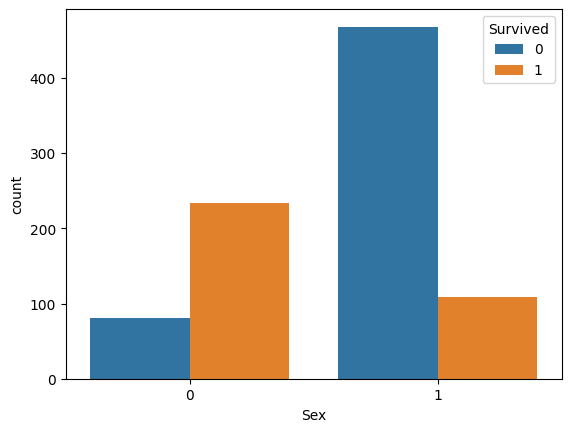

In [24]:
#I will represent the information graphically
sns.countplot(x=data['Sex'] , hue=data['Survived'])

In [25]:
#I want the info about missing data
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#I dont want age column in my dataframe, so i will remove it

data = data.drop(['Age'],axis=1)

In [27]:
# i tried running data.head(10) it gave me error, so i will store it in new variable

new_data = data
new_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,30.0708,NaN,C


In [28]:
#i will train the model by giving pclass and sex as specific feature or as an input to the model and i will store in x
# and survived will be my target variable stored in Y
X = data[['Pclass', 'Sex']]
Y = data['Survived']

In [29]:
#I will split my data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#By using train_test_split, you ensure that your model is evaluated on unseen data, which helps you assess its generalization performance
#and avoid overfitting (model memorizing the training data but performing poorly on new data). This splitting process is a fundamental
#practice in machine learning to ensure that your model's performance is reliable and representative of how it will perform on real-world, unseen data.

In [30]:
#training logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [35]:
#Predict the target values
pred = print(log_reg.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [34]:
#I will print the actual target value
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [49]:
#Make the prediction and print the result accordingly

import warnings
warnings.filterwarnings("ignore")

pred = log_reg.predict([[2,1]])

if(pred == 0):
    print("Not Survived")
else: 
    print("Survived")

Not Survived


In [54]:
#i will predict the target values one more time to check for the accuracy
pred = log_reg.predict(X_test)

In [61]:
#i need a summary of performance of classification maodel so i will generate a classification report
from sklearn.metrics import classification_report
classification_report(Y_test , pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       110\n           1       0.73      0.71      0.72        69\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.77      0.77       179\nweighted avg       0.79      0.79      0.79       179\n'

In [62]:
#I will compute a confusion matrix for evaluating the performance of classification model
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test , pred)

array([[92, 18],
       [20, 49]], dtype=int64)

In [65]:
#I want the accuracy of classification model's prediction
from sklearn.metrics import accuracy_score
accuracy_score(Y_test , pred)

0.7877094972067039

In [ ]:
#The accuracy of my model is 78.77% which is suggesting me that my logistic regression model is 
#correctly classifying 78.7% of instance in my training dataset.
#Roughly 78.77% of the prediction made by the model MATCH the actual true value in testing data.